# DBSCAN (Density-Based Spatial Clustering of Application with Noise)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. DBSCAN from scratch

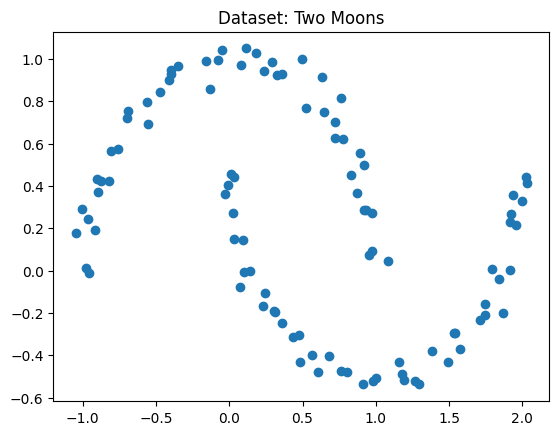

In [2]:
from sklearn.datasets import make_moons

X = make_moons(n_samples=100, noise=0.05, random_state=0)[0]

plt.scatter(X[:, 0], X[:, 1])
plt.title("Dataset: Two Moons")
plt.show()

### Step 1: Compute pairwise squared distance

In [3]:
# Hyperparameters
EPS = 0.2
MIN_SAMPLES = 5

In [4]:
a_squared = np.sum(X**2, axis=1)
a_b = X @ X.T

squared_distances = a_squared.reshape(-1, 1) + a_squared.reshape(1, -1) - 2 * a_b

In [5]:
squared_distances

array([[0.        , 4.76011893, 1.90906485, ..., 1.98645532, 1.61111124,
        1.36009311],
       [4.76011893, 0.        , 0.68792799, ..., 1.63124644, 7.94541646,
        7.83087201],
       [1.90906485, 0.68792799, 0.        , ..., 0.41000533, 4.08656582,
        3.96247188],
       ...,
       [1.98645532, 1.63124644, 0.41000533, ..., 0.        , 2.53904303,
        2.5469231 ],
       [1.61111124, 7.94541646, 4.08656582, ..., 2.53904303, 0.        ,
        0.01504071],
       [1.36009311, 7.83087201, 3.96247188, ..., 2.5469231 , 0.01504071,
        0.        ]])

In [6]:
len(squared_distances[0])

100

### Step 2: Find neighbors

In [7]:
neighbors = np.zeros(shape=(len(X), len(X)))

for i in range(len(X)):
    for j in range(len(squared_distances[i])):
        if squared_distances[i, j] < EPS ** 2:
            neighbors[i, j] = 1

neighbor_counts = np.sum(neighbors, axis=1)
neighbor_counts

array([6., 5., 5., 5., 7., 5., 3., 5., 7., 6., 5., 3., 6., 6., 7., 6., 6.,
       6., 7., 5., 7., 7., 6., 5., 6., 2., 7., 5., 6., 6., 8., 6., 6., 6.,
       5., 5., 5., 5., 7., 4., 3., 6., 7., 7., 5., 5., 4., 6., 6., 5., 4.,
       5., 3., 6., 4., 5., 5., 5., 7., 5., 8., 5., 7., 6., 6., 6., 6., 6.,
       7., 5., 6., 5., 4., 7., 4., 5., 6., 5., 6., 6., 6., 5., 7., 6., 6.,
       7., 7., 6., 6., 6., 7., 6., 7., 5., 6., 7., 6., 6., 5., 7.])

### Step 3: Find core points

In [8]:
core_points = np.array([1 if count >= MIN_SAMPLES else 0 for count in neighbor_counts])
core_points

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Step 4: Assign clusters

In [9]:
labels = np.full(fill_value=-1, shape=(len(X),))
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [10]:
def expand_cluster(point_id, cluster, core_points, neighbors, labels):
    labels[point_id] = cluster

    point_neighbors = []
    for j in range(len(neighbors[point_id])):
        if neighbors[point_id, j] == 1:
             point_neighbors.append(j)

    core_neighbors = []
    for neighbor_point in point_neighbors:
        if labels[neighbor_point] == -1:
            labels[neighbor_point] = cluster

            if core_points[neighbor_point] == 1:
                expand_cluster(neighbor_point, cluster=cluster, core_points=core_points, neighbors=neighbors, labels=labels)

In [11]:
cluster = 0

for i in range(len(core_points)):
    if core_points[i] == 1 and labels[i] == -1:
        expand_cluster(i, cluster=cluster, core_points=core_points, neighbors=neighbors, labels=labels)
        cluster += 1

In [12]:
labels

array([ 0,  1,  2,  1,  1,  3,  2,  1,  1,  3,  1,  1,  1,  2,  2,  0,  0,
        0,  0,  2,  0,  1,  2,  1,  0, -1,  2,  3,  1,  1,  1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  2,  1,  0,  0,  2,  2,  0,  0,  0,  2,  1,
        1,  2,  0,  0,  1,  2,  0,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,
        2,  1,  0,  0,  0,  3,  3,  1,  0,  3,  1,  1,  0,  0,  1,  0,  0,
        1,  1,  2,  1,  1,  1,  0,  0,  1,  2,  3,  1,  1,  0,  0])

### Step 5: Show clusters

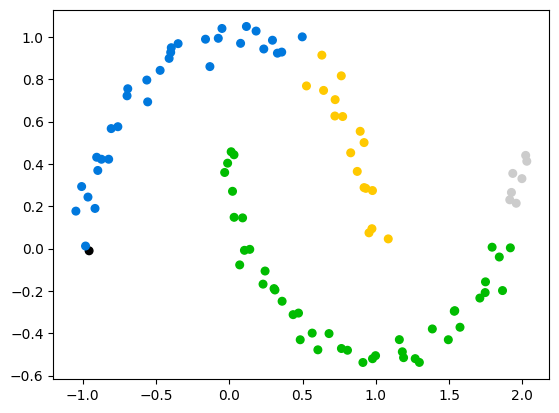

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='nipy_spectral', s=30)
plt.show()

## 3. DBSCAN from sklearn

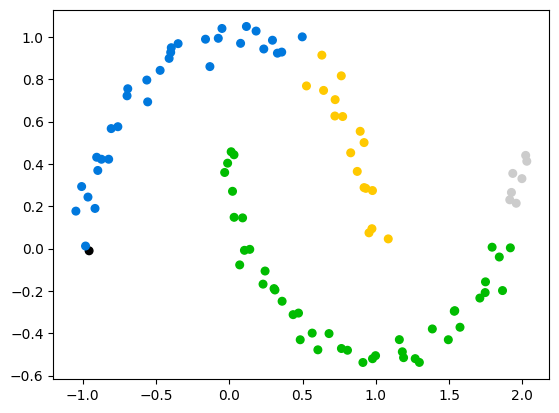

In [14]:
from sklearn.cluster import DBSCAN

sk_clusterer = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
sk_labels = sk_clusterer.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=sk_labels, cmap='nipy_spectral', s=30)